In [1]:
# each day, users watch 1 video of given length
# test hypothesis: "users watch shorter videos on day 1" 

import pandas as pd
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set() # now plt refers to sns.plt, not pyplot

s = """
uid,dt,vlen
1,2010-01-01,100
1,2010-01-02,60
1,2010-01-03,150
2,2010-01-02,120
3,2010-01-01,70
3,2010-01-04,90
4,2010-01-01,80
4,2010-01-03,70
4,2010-01-06,110
"""

df = pd.read_csv(StringIO(s))
df.head()

,uid,dt,vlen
0,1,2010-01-01,100
1,1,2010-01-02,60
2,1,2010-01-03,150
3,2,2010-01-02,120
4,3,2010-01-01,70


In [2]:
# find 1st vid length
def slice_avg(s, start, end):
    """ compute avg of a slice of s """
    if end <= start or end > len(s): # slice is bigger than series
        return np.nan
    else:
        return s.iloc[start:end].mean()
    
def test_slice_avg(f):
    assert f(pd.Series([1,2,3]),1,3) == 2.5
    assert f(pd.Series([1,2,3]),1,2) == 2
    assert f(pd.Series([1,2,3]),1,1) is np.nan
    assert f(pd.Series([1,2,3]),2,1) is np.nan
    
test_slice_avg(slice_avg)

user_df = (
    df
    .sort_values(by='dt')
    .groupby('uid')
    .agg(
        {
            'vlen': [
                'count',
                lambda x: slice_avg(x,0,1), 
                lambda x: slice_avg(x,1,len(x))
            ]
        }
    )
)
user_df.columns = ['nvids','len1','len2']
user_df = user_df.query('nvids >= 2') # compare apples to apples: keep only users with 2+ videos
user_df

,nvids,len1,len2
uid,,,
1,3,100,105.0
3,2,70,90.0
4,3,80,90.0


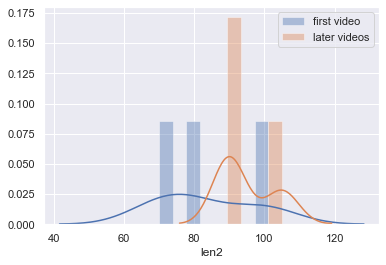

In [3]:
low = user_df[['len1','len2']].values.min()
hi = user_df[['len1','len2']].values.max()
bins = np.linspace(low,hi,10)

sns.distplot(user_df['len1'], bins=bins, label="first video")
sns.distplot(user_df['len2'], bins=bins, label="later videos")
plt.legend();
